In [1]:
%matplotlib inline
from river.datasets import synth
from clustream import CluStream
from river import drift
import math
import numpy as np
import matplotlib.pyplot as plt
from river.utils import dict2numpy
from scipy.spatial import distance_matrix
from time import time
from river import stream
import pandas as pd
from sklearn.decomposition import PCA


In [26]:
ds = pd.read_csv('./covtype.csv',header=None)
# ds["class"] = ds["class"].astype('category')
# ds["class"] = ds["class"].cat.codes
y = ds.pop(54)

pca = PCA(2)

ds = pca.fit_transform(ds)

ds = pd.DataFrame(ds,columns=['X1','X2'])

# ds = iter(stream.iter_pandas(ds,y1))
# ds2 = iter(stream.iter_pandas(ds2,y2))
# drift_stream = synth.ConceptDriftStream(ds,ds2,500,500)
#learner = CluStream(n_macro_clusters=3,max_micro_clusters=20,time_window=200,time_gap=10,micro_cluster_r_factor=0.1)


In [ ]:
fig, ax = plt.subplots(nrows=2,ncols=2,figsize = (10,10))
lst1 = []
lst2 = []
lst3 = []
i = 1
k,m = 0,0
#tup = [(0,0),(0,1),(0,2),(1,0),(1,1),(1,2),(2,0),(2,1),(2,2)]
tup = [(0,0),(0,1),(1,0),(1,1)]
l = 0
for x,y in stream.iter_pandas(ds,y):
    
    learner = learner.learn_one(x)
    learner.predict_one(x)
    
    if y == 1.0 :
        lst1.append([x['X1'],x['X2']])
    elif y == 2.0 :
        lst2.append([x['X1'],x['X2']])
    else :
        lst3.append([x['X1'],x['X2']])

    if i > 2000 :
        break
    
    if i % 500 == 0 and i <= 2000 :
        k,m = tup[l]
        centers = learner.get_micro_clusters()
        centers = dict2numpy(centers)
        centers = [dict2numpy(x) for x in centers]
        centers = np.array(centers)

   

        lst1 = np.array(lst1)
        lst2 = np.array(lst2) 
        lst3 = np.array(lst3) 
        ax[k,m].scatter(lst1[:,0],lst1[:,1])
        ax[k,m].scatter(lst2[:,0],lst2[:,1])
        ax[k,m].scatter(lst3[:,0],lst3[:,1])
        ax[k,m].scatter(centers[:,0],centers[:,1])
      
        ax[k,m].set_title(f'T = {i}')
        l += 1
        lst1 = []
        lst2 = []
        lst3 = []
            


    i += 1 

fig.savefig('concept_drift.jpg')

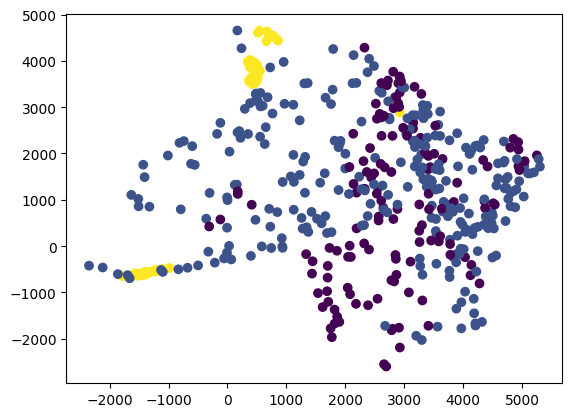

In [30]:
arr1 = ds.iloc[:500,0].to_numpy()
arr2 = ds.iloc[:500,1].to_numpy()

plt.scatter(arr1,arr2,c = y[:500])

